<a href="https://colab.research.google.com/github/hwangsaeyeon/Suffer-SUMO-RL/blob/main/Q-Learning/QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Env

In [1]:
!sudo add-apt-repository ppa:sumo/stable
!sudo apt-get update
!sudo apt-get install sumo sumo-tools sumo-doc 

 SUMO is a highly portable, microscopic traffic simulation package designed to handle large road networks. SUMO is open source, licensed under the EPLv2.
 More info: https://launchpad.net/~sumo/+archive/ubuntu/stable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.

In [2]:
#"Please declare the environment variable 'SUMO_HOME'" 문제 해결 
import os
os.environ['SUMO_HOME'] = "/usr/share/sumo"
!export LIBSUMO_AS_TRACI=1

In [3]:
!pip install sumo-rl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 144 kB 35.5 MB/s 
     |████████████████████████████████| 796 kB 50.2 MB/s 
     |████████████████████████████████| 262 kB 72.8 MB/s 
     |████████████████████████████████| 694 kB 78.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.24.0-py3-none-any.whl size=790706 sha256=09980a38514a21c8fd2a4cfbe88f65348bf97ed6a1aeab6135b3fff1f6306044
  Stored in directory: /root/.cache/pip/wheels/9b/47/57/bc885affe6e76f253f44982605bc912d681e890e3ceaa74254
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [4]:
!git clone https://github.com/LucasAlegre/sumo-rl
%cd sumo-rl
!pip install -e .

Cloning into 'sumo-rl'...
remote: Enumerating objects: 1959, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 1959 (delta 119), reused 151 (delta 99), pack-reused 1771
Receiving objects: 100% (1959/1959), 41.61 MiB | 25.05 MiB/s, done.
Resolving deltas: 100% (922/922), done.
/content/sumo-rl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/sumo-rl
     |████████████████████████████████| 836 kB 23.1 MB/s 
     |████████████████████████████████| 816 kB 77.1 MB/s 
  Attempting uninstall: pettingzoo
    Found existing installation: PettingZoo 1.18.1
    Uninstalling PettingZoo-1.18.1:
      Successfully uninstalled PettingZoo-1.18.1
  Attempting uninstall: sumo-rl
    Found existing installation: sumo-rl 1.3.0
    Uninstalling sumo-rl-1.3.0:
      Successfully uninstalled sumo-rl-1.3.0
  Running setup.py develop for sumo-rl


##Environment Setting

In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np 
import sumo_rl

env = gym.make('sumo-rl-v0',
                net_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection.net.xml',
                route_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection-vhvh.rou.xml',
                out_csv_name='outputs/2way-single-intersection/dqn',
                single_agent=True,
                num_seconds=100000)

obs, info = env.reset()
done = False


print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

for i in range(20): 
    print(env.action_space.sample())
    next_obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
    done = terminated or truncated

    print('terminated :',terminated)
    print('truncated :', truncated)
    print('next_obs :', next_obs)
    print('reward :',reward)
    if done: 
        break 

env.close()

 Retrying in 1 seconds
 Retrying in 1 seconds


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Observation space: Box(0.0, 1.0, (21,), float32)
Action space: Discrete(4)
1
terminated : False
truncated : False
next_obs : [1.         0.         0.         0.         0.         0.10567101
 0.05283551 0.10567101 0.05283551 0.10567101 0.05283551 0.10567101
 0.05283551 0.         0.         0.         0.         0.
 0.         0.         0.        ]
reward : 0.0
3
terminated : False
truncated : False
next_obs : [1.         0.         0.         0.         1.         0.10567101
 0.05283551 0.10567101 0.05283551 0.10567101 0.05283551 0.10567101
 0.05283551 0.         0.         0.         0.         0.
 0.         0.         0.        ]
reward : 0.0
2
terminated : False
truncated : False
next_obs : [1.         0.         0.         0.         1.         0.10567101
 0.10567101 0.10567101 0.05283551 0.10567101 0.10567101 0.10567101
 0.05283551 0.         0.05283551 0.05283551 0.         0.
 0.         0.05283551 0.05283551]
reward : -0.07
1
terminated : False
truncated : False
next_obs : 

In [9]:
class QLearning: 
    def __init__(self,Q,env):
        self.Q = Q
        self.n_actions = env.action_space
    
        self.alpha = 1 
        self.gamma = 0.9

    def action(self,state,epsilon): 
        if np.random.random() < epsilon: 
            action = self.n_actions.sample() 
        else:
            action = np.argmax(self.Q[state])

        return action 

    def step(self, state, action, next_state): 
        self.Q[state][action] =  self.Q[state][action] + self.alpha*(reward + self.gamma*np.max(self.Q[next_state]) - self.Q[state][action]) 

##Q-Learning Training

In [ ]:
from collections import defaultdict
import gymnasium as gym
rewards = []
epsilon_decay = []
episode_list = []

Q = defaultdict(lambda: np.zeros(env.action_space.n))

env = gym.make('sumo-rl-v0',
                net_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection.net.xml',
                route_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection-vhvh.rou.xml',
                out_csv_name='outputs/2way-single-intersection/dqn',
                single_agent=True,
                num_seconds=100000)

model = QLearning(Q,env)



epsilon = 1

for ep in range(1000):

  #observe the initial state s 
  obs,info = env.reset()
  
  done = False
  cumulative_rewards = 0
  epsilon *= 0.99 

  #repeat for each step of episode
  for t in range(500):
    state = tuple([np.where(obs[:4]==1)[0][0], obs[4]] + list(min(int(i*10),9) for i in obs[5:]))

    #select an action a from state s(e.g. epsilon-greedy) and execute it
    action = model.action(state,epsilon)


    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    
    #Update the table entry for Q(s,a) as follows:
    next_state = tuple([np.where(next_obs[:4]==1)[0][0], next_obs[4]] +  list(min(int(i*10),9) for i in next_obs[5:]))

    #Q[state,action] = Q[state,action] + 0.1*(reward + 1*np.max(Q[next_state,:]) - Q[state,action])
    model.step(state, action, next_state)
    obs = next_obs
    cumulative_rewards += reward
    
    if done:
        break 

  
  if (ep-1)%10 == 0:
    print("--------------------------------")  
    print('episode:',ep)  
    print('epsilon:',epsilon)
    print('rewards:',cumulative_rewards)
    print('timesteps:',t)
    
  episode_list.append(ep)
  epsilon_decay.append(epsilon)
  rewards.append(cumulative_rewards)


 Retrying in 1 seconds
 Retrying in 1 seconds


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 Retrying in 1 seconds
--------------------------------
episode: 1
epsilon: 0.9801
rewards: -22.77
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
--------------------------------
episode: 11
epsilon: 0.8863848717161291
rewards: -45.84
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
--------------------------------
episode: 21
epsilon: 0.8016305895390458
rewards: -19.04
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying i

Exception ignored in: <function SumoEnvironment.__del__ at 0x7fd57bf3a790>
Traceback (most recent call last):
  File "/content/sumo-rl/sumo_rl/environment/env.py", line 384, in __del__
    self.close()        
  File "/content/sumo-rl/sumo_rl/environment/env.py", line 377, in close
    traci.close()
  File "/usr/local/lib/python3.8/dist-packages/traci/main.py", line 263, in close
    _connections[""].close(wait)
  File "/usr/local/lib/python3.8/dist-packages/traci/connection.py", line 355, in close
    self._sendCmd(tc.CMD_CLOSE, None, None)
  File "/usr/local/lib/python3.8/dist-packages/traci/connection.py", line 189, in _sendCmd
    return self._sendExact()
  File "/usr/local/lib/python3.8/dist-packages/traci/connection.py", line 106, in _sendExact
    raise TraCIException(err, prefix[1], _RESULTS[prefix[2]])
KeyError: 81


--------------------------------
episode: 201
epsilon: 0.1313134793282883
rewards: -94.84
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
--------------------------------
episode: 211
epsilon: 0.11875755691154315
rewards: -73.77
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
--------------------------------
episode: 221
epsilon: 0.1074022057426376
rewards: -90.38
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 se

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

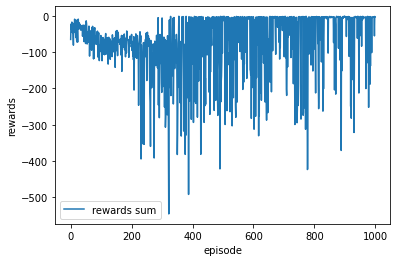

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
from google.colab import widgets

#rewards per episode 
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards,label='rewards sum')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()

In [ ]:
np.save('qlearning_table', np.array(dict(Q)))

##Testing

In [69]:
Q = np.load('/content/qlearning_table.npy',allow_pickle=True)

In [70]:
from collections import defaultdict
import gymnasium as gym
rewards = []
epsilon_decay = []
episode_list = []


env = gym.make('sumo-rl-v0',
                net_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection.net.xml',
                route_file='/content/sumo-rl/nets/2way-single-intersection/single-intersection-vhvh.rou.xml',
                out_csv_name='outputs/2way-single-intersection/dqn',
                single_agent=True,
                num_seconds=100000)
Q = Q.item()
model = QLearning(Q,env)
epsilon = 0 

for ep in range(100):

  obs,info = env.reset()
  done = False
  cumulative_rewards = 0

  for t in range(500): 
    state = tuple([np.where(obs[:4]==1)[0][0], obs[4]] + list(min(int(i*10),9) for i in obs[5:]))
    try:
        action = model.action(state,epsilon)
    except:
        action = env.action_space.sample() 
    next_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    obs = next_obs
    cumulative_rewards += reward
    
    if done:
        break 

  
  if (ep-1)%10 == 0:
    print("--------------------------------")  
    print('episode:',ep)  
    print('epsilon:',epsilon)
    print('rewards:',cumulative_rewards)
    print('timesteps:',t)
    
  episode_list.append(ep)
  epsilon_decay.append(epsilon)
  rewards.append(cumulative_rewards)

 Retrying in 1 seconds
 Retrying in 1 seconds


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 Retrying in 1 seconds
--------------------------------
episode: 1
epsilon: 0
rewards: -11.97
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
--------------------------------
episode: 11
epsilon: 0
rewards: -14.5
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
--------------------------------
episode: 21
epsilon: 0
rewards: -45.4
timesteps: 499
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
-----------------------------

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

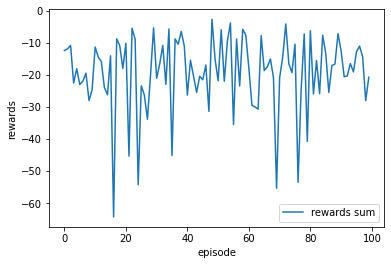

<IPython.core.display.Javascript object>

In [72]:
import matplotlib.pyplot as plt
from google.colab import widgets

#rewards per episode 
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards,label='rewards sum')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()